# Training Deep Neural Networks

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import tensorflow as tf
from tensorflow import keras

## Vanishing/Exploding Gradients Problem

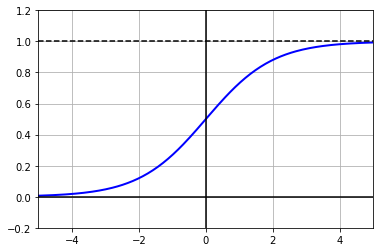

In [11]:
def logit(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot(z, logit(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.axis([-5, 5, -0.2, 1.2])
plt.grid(True)
plt.show()

## Xavier and He Initialization

In [16]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [12]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [14]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

## Nonsaturating Activation Functions

### Leaky ReLU

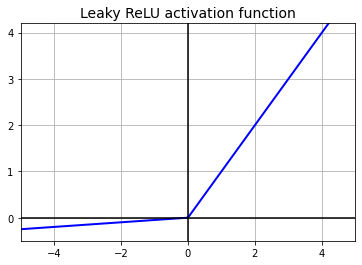

In [25]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -0.5, 4.2])
plt.title("Leaky ReLU activation function", fontsize=14)
plt.show()

In [17]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [18]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [2]:
# Train a neural network on Fashion MNIST using the Leaky ReLU:

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 3ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7955 - accuracy: 0.7362 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7900
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5832 - accuracy: 0.8075 - val_loss: 0.5582 - val_accuracy: 0.8202
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5338 - accuracy: 0.8225 - val_loss: 0.5157 - val_accuracy:

### ELU

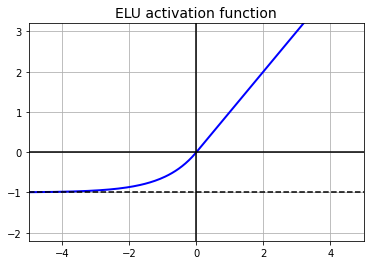

In [24]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.title("ELU activation function", fontsize=14)
plt.show()

In [21]:
keras.layers.Dense(10, activation="elu")

In [22]:
# Train a neural network on Fashion MNIST using the Leaky ReLU:

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal", activation="elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.1201 - accuracy: 0.6462 - val_loss: 0.7927 - val_accuracy: 0.7376
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7228 - accuracy: 0.7570 - val_loss: 0.6571 - val_accuracy: 0.7822
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6316 - accuracy: 0.7878 - val_loss: 0.5999 - val_accuracy: 0.8022
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5824 - accuracy: 0.8044 - val_loss: 0.5562 - val_accuracy: 0.8216
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5508 - accuracy: 0.8149 - val_loss: 0.5306 - val_accuracy: 0.8268
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5281 - accuracy: 0.8201 - val_loss: 0.5113 - val_accuracy: 0.8294
Epoch 7/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5108 - accuracy: 0.8253 - val_loss: 0.4957 - val_accuracy:

### SELU

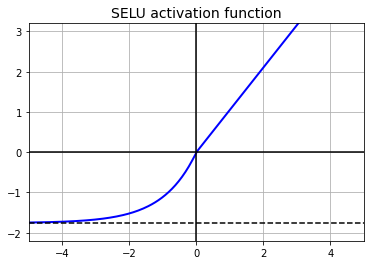

In [23]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [26]:
# By default, the SELU hyperparameters (scale and alpha) are tuned in such a way that 
# the mean output of each neuron remains close to 0
# and the standard deviation remains close to 1

np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [9]:
# neural net for Fashion MNIST with 100 hidden layers, using the SELU activation function
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

# scale the inputs to mean 0 and standard deviation 1
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 22s 13ms/step - loss: 1.1930 - accuracy: 0.5510 - val_loss: 0.9483 - val_accuracy: 0.6530
Epoch 2/5
1719/1719 [==============================] - 20s 11ms/step - loss: 0.7059 - accuracy: 0.7435 - val_loss: 0.5913 - val_accuracy: 0.7944
Epoch 3/5
1719/1719 [==============================] - 20s 11ms/step - loss: 0.6215 - accuracy: 0.7766 - val_loss: 0.6505 - val_accuracy: 0.7614
Epoch 4/5
1719/1719 [==============================] - 20s 12ms/step - loss: 0.5579 - accuracy: 0.8040 - val_loss: 0.5083 - val_accuracy: 0.8226
Epoch 5/5
1719/1719 [==============================] - 20s 12ms/step - loss: 0.5130 - accuracy: 0.8181 - val_loss: 0.5347 - val_accuracy: 0.8156


In [32]:
# if we try to use the ReLU activation function instead,
# we suffer from the vanishing/exploding gradients problem

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 20s 12ms/step - loss: 1.8060 - accuracy: 0.2529 - val_loss: 1.3437 - val_accuracy: 0.3672
Epoch 2/5
1719/1719 [==============================] - 20s 11ms/step - loss: 1.2462 - accuracy: 0.4621 - val_loss: 1.3519 - val_accuracy: 0.4402
Epoch 3/5
1719/1719 [==============================] - 20s 11ms/step - loss: 1.0535 - accuracy: 0.5635 - val_loss: 0.9218 - val_accuracy: 0.5780
Epoch 4/5
1719/1719 [==============================] - 20s 11ms/step - loss: 0.8641 - accuracy: 0.6433 - val_loss: 0.8230 - val_accuracy: 0.6772
Epoch 5/5
1719/1719 [==============================] - 20s 11ms/step - loss: 0.8824 - accuracy: 0.6671 - val_loss: 0.7656 - val_accuracy: 0.7232


## Batch Normalization

In [29]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_212 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_213 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_214 (Dense)            (None, 10)               

In [30]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8750 - accuracy: 0.7124 - val_loss: 0.5525 - val_accuracy: 0.8228
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5754 - accuracy: 0.8031 - val_loss: 0.4725 - val_accuracy: 0.8470
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5190 - accuracy: 0.8203 - val_loss: 0.4374 - val_accuracy: 0.8552
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4827 - accuracy: 0.8324 - val_loss: 0.4152 - val_accuracy: 0.8604
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4566 - accuracy: 0.8409 - val_loss: 0.3997 - val_accuracy: 0.8640
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4398 - accuracy: 0.8473 - val_loss: 0.3868 - val_accuracy: 0.8696
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4242 - accuracy: 0.8514 - val_loss: 0.3764 - val_accuracy:

## Reusing Pretrained Layers: Transfer Learning

In [3]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]


tf.random.set_seed(42)
np.random.seed(42)

# Fashion MNIST classifier with only 8 classes (doesnt have shirts and sandals)
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

model_A.save("my_model_A.h5")

# binary classsifier, positive=shirt, negative=sandal
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.5926 - accuracy: 0.8104 - val_loss: 0.3896 - val_accuracy: 0.8662
Epoch 2/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3288 - val_accuracy: 0.8827
Epoch 3/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3170 - accuracy: 0.8895 - val_loss: 0.3014 - val_accuracy: 0.8986
Epoch 4/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2973 - accuracy: 0.8975 - val_loss: 0.2896 - val_accuracy: 0.9011
Epoch 5/20
1375/1375 [==============================] - 3s 3ms/step - loss: 0.2835 - accuracy: 0.9022 - val_loss: 0.2775 - val_accuracy: 0.9061
Epoch 6/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9060 - val_loss: 0.2736 - val_accuracy: 0.9066
Epoch 7/20
1375/1375 [==============================] - 3s 3ms/step - loss: 0.2641 - accuracy: 0.9092 - val_loss: 0.2718 - val_accuracy:

In [4]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 25ms/step - loss: 0.5797 - accuracy: 0.6550 - val_loss: 0.5842 - val_accuracy: 0.6339
Epoch 2/4
7/7 [==============================] - 0s 12ms/step - loss: 0.5432 - accuracy: 0.6800 - val_loss: 0.5467 - val_accuracy: 0.6795
Epoch 3/4
7/7 [==============================] - 0s 12ms/step - loss: 0.5063 - accuracy: 0.7200 - val_loss: 0.5146 - val_accuracy: 0.7099
Epoch 4/4
7/7 [==============================] - 0s 11ms/step - loss: 0.4748 - accuracy: 0.7450 - val_loss: 0.4859 - val_accuracy: 0.7353
Epoch 1/16
7/7 [==============================] - 0s 27ms/step - loss: 0.3964 - accuracy: 0.8150 - val_loss: 0.3465 - val_accuracy: 0.8641
Epoch 2/16
7/7 [==============================] - 0s 11ms/step - loss: 0.2801 - accuracy: 0.9350 - val_loss: 0.2607 - val_accuracy: 0.9300
Epoch 3/16
7/7 [==============================] - 0s 13ms/step - loss: 0.2086 - accuracy: 0.9650 - val_loss: 0.2113 - val_accuracy: 0.9554
Epoch 4/16
7/7 [===============

In [5]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

In [6]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9930


[0.0682930126786232, 0.9929999709129333]

## Faster Optimizers

### Momentum optimization

In [3]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

### Nesterov Accelerated Gradient

In [4]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

### AdaGrad

In [5]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

### RMSProp

In [6]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

### Adam

In [7]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Learning Rate Scheduling

### Power Scheduling

In [10]:
# lr = lr0 / (1 + steps / s)**c
# Keras uses c=1 and s = 1 / decay

optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4919 - accuracy: 0.8265 - val_loss: 0.4029 - val_accuracy: 0.8598
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3809 - accuracy: 0.8643 - val_loss: 0.3728 - val_accuracy: 0.8732
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3483 - accuracy: 0.8761 - val_loss: 0.3737 - val_accuracy: 0.8694
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3272 - accuracy: 0.8832 - val_loss: 0.3507 - val_accuracy: 0.8768
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3122 - accuracy: 0.8890 - val_loss: 0.3450 - val_accuracy: 0.8754
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2985 - accuracy: 0.8932 - val_loss: 0.3429 - val_accuracy: 0.8820
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2886 - accuracy: 0.8974 - val_loss: 0.3373 - val_accuracy:

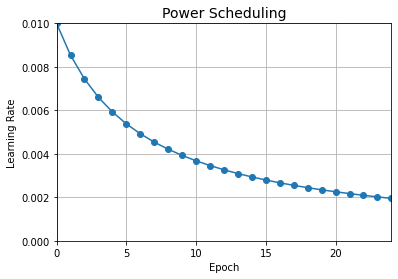

In [11]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Exponential Scheduling

In [12]:
# lr = lr0 * 0.1**(epoch / s)

def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8833 - accuracy: 0.7484 - val_loss: 0.9839 - val_accuracy: 0.7584
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6961 - accuracy: 0.7894 - val_loss: 0.6099 - val_accuracy: 0.8220
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6189 - accuracy: 0.8090 - val_loss: 0.7695 - val_accuracy: 0.7826
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5886 - accuracy: 0.8250 - val_loss: 0.5476 - val_accuracy: 0.8372
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5263 - accuracy: 0.8413 - val_loss: 0.5451 - val_accuracy: 0.8534
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4804 - accuracy: 0.8552 - val_loss: 0.5369 - val_accuracy: 0.8540
Epoch 7/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4639 - accuracy: 0.8651 - val_loss: 0.5092 - val_accuracy:

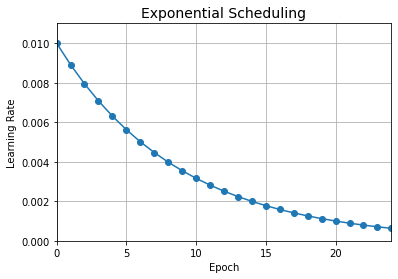

In [13]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Piecewise Constant Scheduling

In [14]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8500 - accuracy: 0.7552 - val_loss: 1.3275 - val_accuracy: 0.6630
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8507 - accuracy: 0.7640 - val_loss: 0.7607 - val_accuracy: 0.8118
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7649 - accuracy: 0.7908 - val_loss: 0.9922 - val_accuracy: 0.6928
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8366 - accuracy: 0.7635 - val_loss: 0.8113 - val_accuracy: 0.7894
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8042 - accuracy: 0.7717 - val_loss: 1.0177 - val_accuracy: 0.6934
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5257 - accuracy: 0.8398 - val_loss: 0.5433 - val_accuracy: 0.8446
Epoch 7/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4737 - accuracy: 0.8547 - val_loss: 0.5502 - val_accuracy:

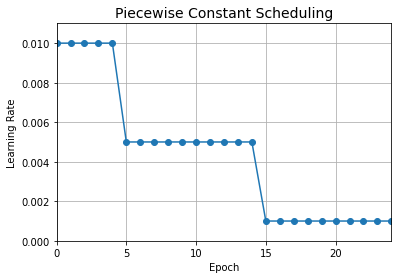

In [15]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Performance Scheduling

In [16]:
tf.random.set_seed(42)
np.random.seed(42)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5900 - accuracy: 0.8071 - val_loss: 0.4838 - val_accuracy: 0.8480
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4916 - accuracy: 0.8420 - val_loss: 0.6018 - val_accuracy: 0.8404
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5063 - accuracy: 0.8419 - val_loss: 0.5696 - val_accuracy: 0.8396
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5137 - accuracy: 0.8467 - val_loss: 0.5108 - val_accuracy: 0.8498
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5255 - accuracy: 0.8484 - val_loss: 0.4435 - val_accuracy: 0.8562
Epoch 6/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5059 - accuracy: 0.8558 - val_loss: 0.5879 - val_accuracy: 0.8504
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5042 - accuracy: 0.8573 - val_loss: 0.4694 - val_accuracy:

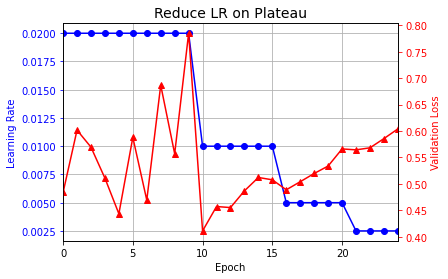

In [17]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

## Avoiding Overfitting Through Regularization

### $\ell_1$ and $\ell_2$ regularization

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 1.5956 - accuracy: 0.8124 - val_loss: 0.7169 - val_accuracy: 0.8340
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7197 - accuracy: 0.8274 - val_loss: 0.6850 - val_accuracy: 0.8376


### Dropout

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5597 - accuracy: 0.8059 - val_loss: 0.3672 - val_accuracy: 0.8656
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4230 - accuracy: 0.8453 - val_loss: 0.3474 - val_accuracy: 0.8686
